In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Computer.use_jedi = False
import requests
import folium
# !pip install pandas # 파이썬 데이터 처리
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rc('font', family='D2Coding')

In [90]:
# 서울 지하철 승하차량
targetSite = 'https://data.gg.go.kr/portal/data/sheet/searchSheetData.do?page=1'
request = requests.post(targetSite, data={
    'rows': '1',
    'infId': '7GZ08I0JWSNPY5NVMLLG24313533',
    'infSeq': 1,
    'STATN_NM': '시청',
    'TKALGHT_DIV_NM' : '',
    'STD_DE' : '', 
    'STATN_NO' : '',
    'TM05_PSNCNT' : '',
    'TM06_PSNCNT': '',
    'TM07_PSNCNT': '',
    'TM08_PSNCNT': '',
    'TM09_PSNCNT': '',
    'TM10_PSNCNT': '',
    'TM11_PSNCNT': '',
    'TM12_PSNCNT': '',
    'TM13_PSNCNT': '',
    'TM14_PSNCNT': '',
    'TM15_PSNCNT': '',
    'TM16_PSNCNT': '',
    'TM17_PSNCNT': '',
    'TM18_PSNCNT': '',
    'TM19_PSNCNT': '',
    'TM20_PSNCNT': '',
    'TM21_PSNCNT': '',
    'TM22_PSNCNT': '',
    'TM23_PSNCNT': '',
    'TM24_PSNCNT': ''
})
subway = request.json()
print(type(subway))
print(subway)

<class 'dict'>
{'data': [{'STD_DE': '2022-12-31', 'STATN_NO': 2, 'STATN_NM': '시청', 'TKALGHT_DIV_NM': '승차', 'TM05_PSNCNT': 35, 'TM06_PSNCNT': 53, 'TM07_PSNCNT': 80, 'TM08_PSNCNT': 113, 'TM09_PSNCNT': 232, 'TM10_PSNCNT': 351, 'TM11_PSNCNT': 503, 'TM12_PSNCNT': 565, 'TM13_PSNCNT': 629, 'TM14_PSNCNT': 714, 'TM15_PSNCNT': 967, 'TM16_PSNCNT': 1202, 'TM17_PSNCNT': 1337, 'TM18_PSNCNT': 1351, 'TM19_PSNCNT': 1626, 'TM20_PSNCNT': 1003, 'TM21_PSNCNT': 889, 'TM22_PSNCNT': 657, 'TM23_PSNCNT': 355, 'TM24_PSNCNT': 1149}], 'total': 2270, 'count': 2270, 'page': 1, 'rows': 1, 'pages': 2270}


In [91]:
# pandas.io.json 모듈의 json_normalize() 함수로 json 타입의 데이터가 변환된 딕셔너리를 판다스 데이터프레임으로 변환한다.
# json_nomalize(딕셔너리, '데이터프레임으로 변환할 데이터가 할당된 딕셔너리의 key')
subway_df = pd.json_normalize(subway)
print(type(subway_df)) # <class 'pandas.core.frame.DataFrame'>
print(len(subway_df))
print(subway_df.columns)
# print(subway_df.info)

<class 'pandas.core.frame.DataFrame'>
1
Index(['data', 'total', 'count', 'page', 'rows', 'pages'], dtype='object')


In [92]:
subway_df_map = subway_df[
    [
    'data',
    'total',
    'count',
    'page',
    'rows',
    'pages',
    ]
]
subway_df_map

,data,total,count,page,rows,pages
0,"[{'STD_DE': '2022-12-31', 'STATN_NO': 2, 'STAT...",2270,2270,1,1,2270


In [1]:
# 주어진 데이터
subway_data = {
    'data': [{'STD_DE': '', 'STATN_NM': '종각', 'TKALGHT_DIV_NM': '', 'TM05_PSNCNT': 152, 'TM06_PSNCNT': 107, 'TM07_PSNCNT': 155, 'TM08_PSNCNT': 249, 'TM09_PSNCNT': 307, 'TM10_PSNCNT': 421, 'TM11_PSNCNT': 683, 'TM12_PSNCNT': 929, 'TM13_PSNCNT': 1048, 'TM14_PSNCNT': 1261, 'TM15_PSNCNT': 1749, 'TM16_PSNCNT': 2022, 'TM17_PSNCNT': 2098, 'TM18_PSNCNT': 2055, 'TM19_PSNCNT': 1825, 'TM20_PSNCNT': 1951, 'TM21_PSNCNT': 2233, 'TM22_PSNCNT': 1382, 'TM23_PSNCNT': 6, 'TM24_PSNCNT': 498}],
    'total': 756,
    'count': 756,
    'page': 1,
    'rows': 1,
    'pages': 756
}

# 데이터프레임 생성
subway_df = pd.json_normalize(subway_data, 'data')
print(subway_df)
print(type(subway_df))

NameError: name 'pd' is not defined

In [86]:
subway_df_map = subway_df[
    [
    'STD_DE',
    'STATN_NO',
    'STATN_NM',
    'TKALGHT_DIV_NM',
    'TM05_PSNCNT',
    'TM06_PSNCNT',
    'TM07_PSNCNT',
    'TM08_PSNCNT',
    'TM09_PSNCNT',
    'TM10_PSNCNT',
    'TM11_PSNCNT',
    'TM12_PSNCNT',
    'TM13_PSNCNT',
    'TM14_PSNCNT',
    'TM15_PSNCNT',
    'TM16_PSNCNT',
    'TM17_PSNCNT',
    'TM18_PSNCNT',
    'TM19_PSNCNT',
    'TM20_PSNCNT',
    'TM21_PSNCNT',
    'TM22_PSNCNT',
    'TM23_PSNCNT',
    'TM24_PSNCNT'
    ]
]
subway_df_map

,STD_DE,STATN_NO,STATN_NM,TKALGHT_DIV_NM,TM05_PSNCNT,TM06_PSNCNT,TM07_PSNCNT,TM08_PSNCNT,TM09_PSNCNT,TM10_PSNCNT,...,TM15_PSNCNT,TM16_PSNCNT,TM17_PSNCNT,TM18_PSNCNT,TM19_PSNCNT,TM20_PSNCNT,TM21_PSNCNT,TM22_PSNCNT,TM23_PSNCNT,TM24_PSNCNT
0,,0,,,152,107,155,249,307,421,...,1749,2022,2098,2055,1825,1951,2233,1382,6,498


# STATN_NM에 데이터 넣기
statn_name = '종각'  # 원하는 역명을 입력하세요
subway_df['STATN_NM'] = statn_name

In [87]:
# 종각
subway_df_map[subway_df_map['STATN_NM'] == '종각']

,STD_DE,STATN_NO,STATN_NM,TKALGHT_DIV_NM,TM05_PSNCNT,TM06_PSNCNT,TM07_PSNCNT,TM08_PSNCNT,TM09_PSNCNT,TM10_PSNCNT,...,TM15_PSNCNT,TM16_PSNCNT,TM17_PSNCNT,TM18_PSNCNT,TM19_PSNCNT,TM20_PSNCNT,TM21_PSNCNT,TM22_PSNCNT,TM23_PSNCNT,TM24_PSNCNT


<Figure size 1000x600 with 0 Axes>

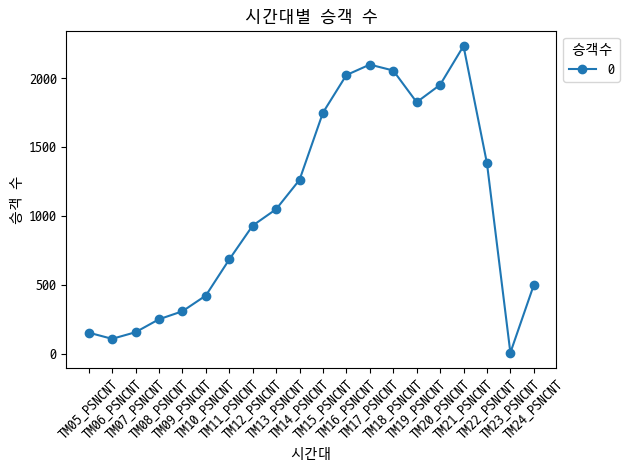

In [89]:
# 시간대별 데이터 추출
time_columns = [f'TM{i:02d}_PSNCNT' for i in range(5, 25)]
time_data = subway_df[time_columns]

# 시간대별 데이터 시각화
plt.figure(figsize=(10, 6))
time_data.transpose().plot(marker='o')
plt.title('시간대별 승객 수')
plt.xlabel('시간대')
plt.ylabel('승객 수')
plt.legend(title='승객수', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(len(time_columns)), time_columns, rotation=45)
plt.tight_layout()
plt.show()